In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn import tree
from datetime import datetime

In [2]:
data = pd.read_csv('data.csv', header=0)

In [3]:
#datetime_str = '2018-10-03 20:55:26'

#datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

#print(type(datetime_object))
#print(datetime_object)  # printed in default format

In [4]:
#time_difference = []
#for index, row in data.iterrows():
#    before = datetime.strptime(row['created'], '%Y-%m-%d %H:%M:%S')
#    after = datetime.strptime(row['completed'], '%Y-%m-%d %H:%M:%S')
#
#    final = after- before
#    final = int(round(final.total_seconds()))
#    time_difference.append(final)


In [5]:
#data['time_difference'] = time_difference

In [6]:
data = data.drop(['sender'], axis=1)
data= data.drop(['recipient'], axis=1)
data.head()
#final.head()

,type,category,business_id,expired,status,amount,time_difference,label
0,2,0,339,0,6677,2230.09,38547,FRAUD
1,2,0,200,1,1,591.94,119,NOT_FRAUD
2,2,3,299,9387,0,4125.98,36,FRAUD
3,0,3,218,1,2,83.89,166,NOT_FRAUD
4,3,1,365,0,1,4178.31,147,NOT_FRAUD


In [7]:
#df = DataFrame(final)
#export_csv = df.to_csv (r'export_dataframe.csv', index = None, header=True) 

In [8]:
features = list(data.columns[0:7])
features

['type',
 'category',
 'business_id',
 'expired',
 'status',
 'amount',
 'time_difference']

In [9]:
y = data['label']
x = data[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

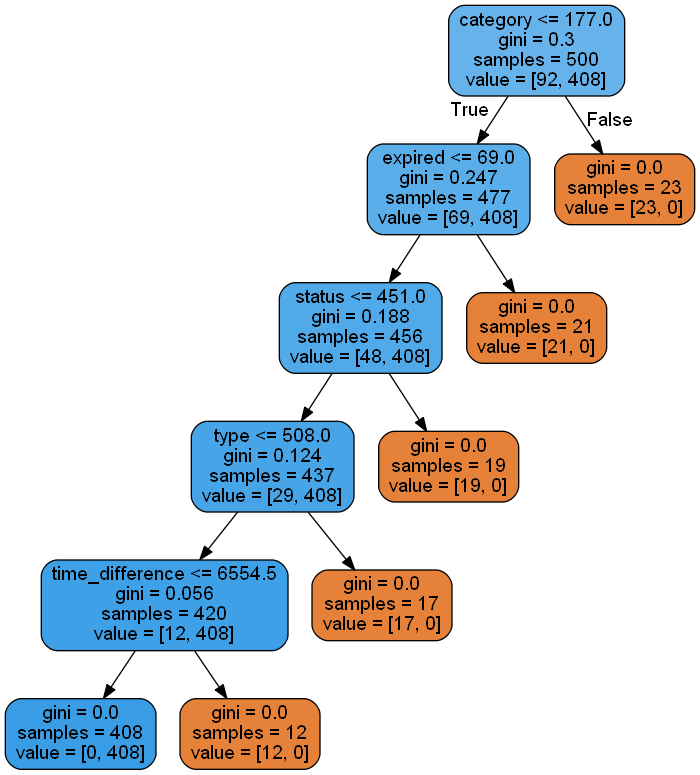

In [10]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=list(features),
                    filled=True, rounded=True,)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [11]:
x = data.values[:, 0:6]
y = data.values[:, 7]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state = 100)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100,
                                        max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [12]:
y_pred_en = clf_entropy.predict(x_test)
print(y_pred_en)

['NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'FRAUD'
 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD'
 '

In [13]:
print("Accuracy is "), accuracy_score(y_test, y_pred_en)*100

Accuracy is 


(None, 91.0)

In [14]:
import pickle
pickle.dump(clf, open('final_prediction.pickle', 'wb'))

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = clf.fit(x, y)

In [16]:
y_pred_en = clf_entropy.predict(x_test)
print(y_pred_en)

['NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'FRAUD'
 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'FRAUD' 'NOT_FRAUD'
 '

In [17]:
print("Accuracy is "), accuracy_score(y_test, y_pred_en)*100

Accuracy is 


(None, 91.0)

In [22]:
from platform import python_version
print(python_version())

3.6.5
